### How to get a sample with a desired mean from an existing random variable?

I thought the question on twitter below by @danjlurie was quite interesting, and since I had never run into this problem before, I tried to figure it out. Below is my solution. It works when sampling with replacement from the original set of values. It samples each value with a probability that is derived by dividing the probability density function of the original set under the desired mean by the probability density function under the original mean.

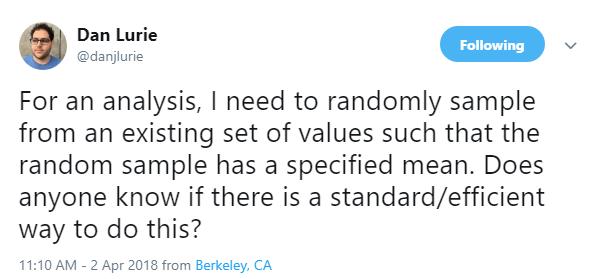

[1] 79.59036

[1] 15.35851

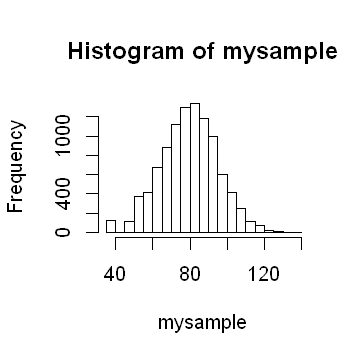

In [8]:
set.seed(19843)

# generate existing pool from which we want the sample
pool = rnorm(10000, mean=100, sd=15)
pool = sort(pool)

# get probability density distribution under original 
# sample and under desired mean and sd
target_mean = 80; target_sd = 15
dens1 = dnorm(pool, mean=mean(pool), sd=sd(pool))
dens2 = dnorm(pool, mean=target_mean, sd=target_sd)

# get desired sampling probability
prob = dens2/dens1
prob = prob/sum(prob)

# sample from the pool with replacement where each 
# value is sampled with the corresponding probability
mysample = sample(pool, 10000, replace=T, prob=prob)

# confirm that sample has desired parameters
options(repr.plot.width=3, repr.plot.height=3)
hist(mysample)
mean(mysample)
sd(mysample)